In [2]:

source('lib.r')
library(scProcess)
library(ggpubr)



In [3]:
load('/home/meisl/Workplace/RCC/Figures.V2/F3.myeloid/Myeloid.RData')
#conM=readRDS('Normal_PTumor.myeloid_conos.rds')


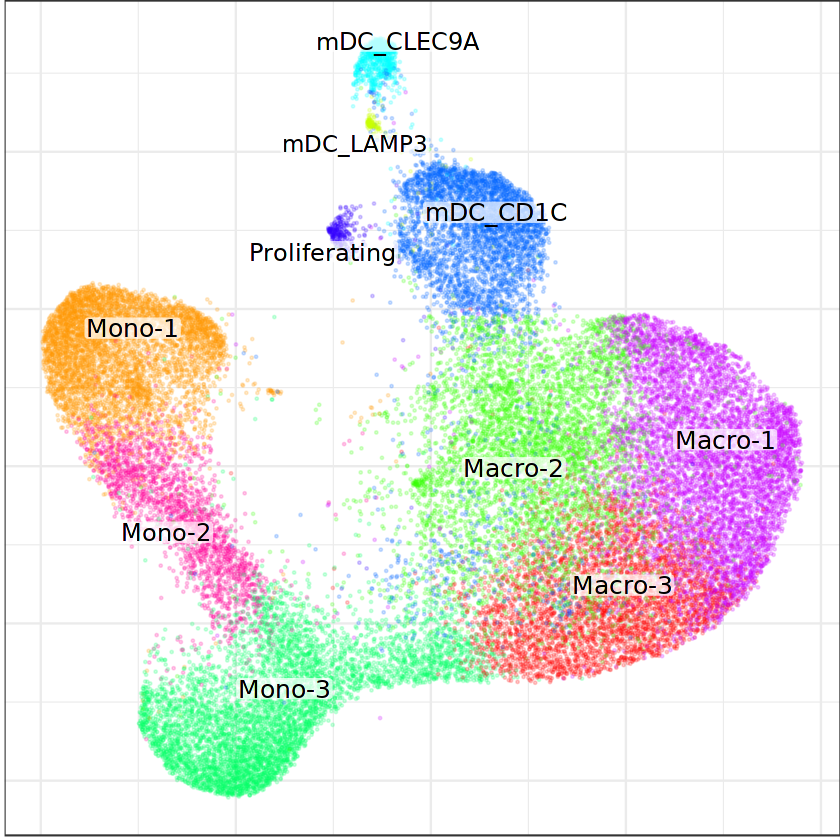

In [4]:
#load('cell.ano.RData')  load cell annotation 
# show major cell annotations

anoM=as.factor(anoM)
anoM.pal <- setNames(sample(rainbow(length(levels(anoM)))),levels(anoM));

anoM.palf <- function(n) return(anoM.pal)

a2=conM$plotGraph(groups=anoM,plot.na=F,palette=anoM.palf,size=0.3,alpha=0.2,font.size = c(4.8, 5.2))
a2

Using SampleType as value column: use value.var to override.



,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,Macro-1,RCC-BM1-Normal,0.097406340
2,Macro-2,RCC-BM1-Normal,0.087031700
3,Macro-3,RCC-BM1-Normal,0.092795389
4,mDC_CD1C,RCC-BM1-Normal,0.116426513
5,mDC_CLEC9A,RCC-BM1-Normal,0.012680115
6,mDC_LAMP3,RCC-BM1-Normal,0.001729107


Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”
Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


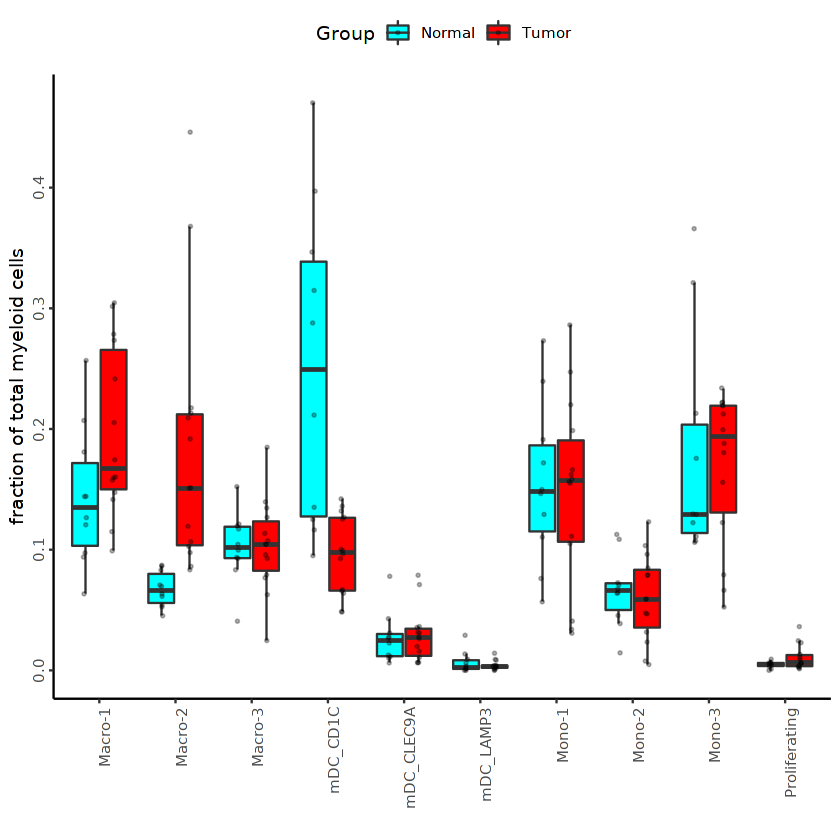

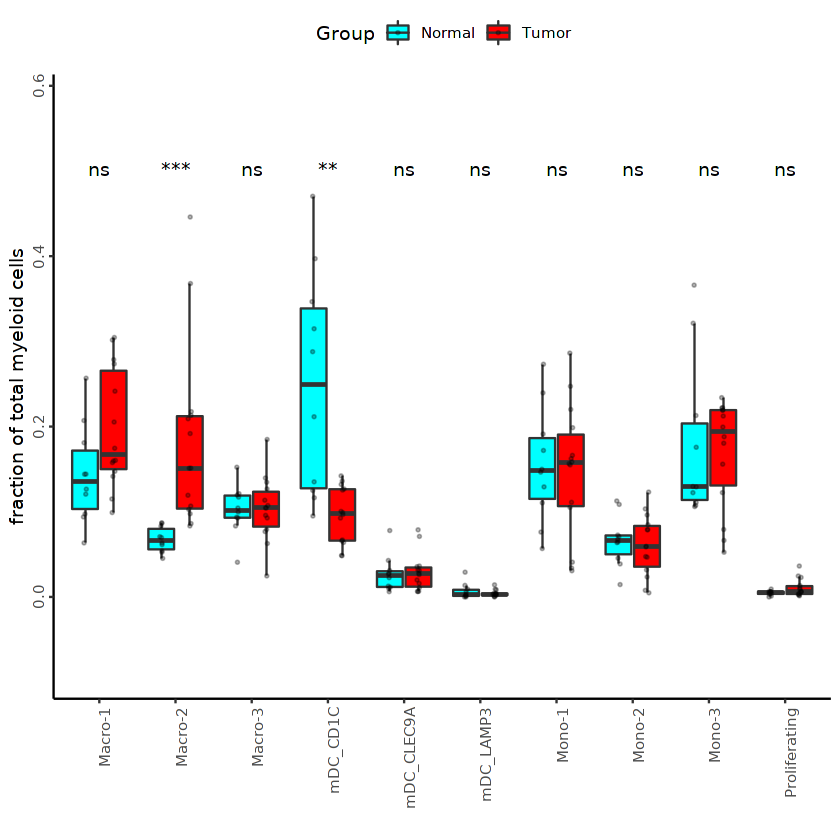

In [6]:
scon = conM
ssamp = scon$getDatasetPerCell()
cname=names(anoM)
ano2=data.frame('Cell'=anoM[cname],'SampleType'=ssamp[cname])

# Annotation vs sample
tmp2 <- acast(ano2, Cell ~ SampleType, fun.aggregate=length)

tmp3 <- (sweep(tmp2, 2, colSums(tmp2), FUN='/'))
tmp4 <- melt(tmp3)
head(tmp4)

names(tmp4) <- c('cell', 'sample','pc.of.sample')

tmp4$Group=NULL
tmp4$Group=sample.groups[as.character(tmp4$sample)]


p <- ggplot(na.omit(tmp4),aes(x=cell,y=pc.of.sample,dodge=Group,fill=Group))+geom_boxplot(notch=FALSE,outlier.shape=NA)  +  geom_point(position = position_jitterdodge(jitter.width=0.1),color=adjustcolor(1,alpha=0.3),pch=19,size=0.5)+theme_classic()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1), axis.text.y = element_text(angle = 90, hjust = 0.5))  +xlab("") +ylab("fraction of total myeloid cells")+theme(legend.position="top")+
  scale_fill_manual(values=fraction.palette1)
p

p=p+ scale_y_continuous(expand = c(0.08, 0.08), limits=c(min(tmp4$pc.of.sample), max(tmp4$pc.of.sample) * 1.05))+ ggpubr::stat_compare_means(label = "p.signif", label.x = 1.5) 
p


[1] "CD14"
[1] "FCGR3A"
[1] "S100A9"
[1] "TNF"
[1] "EREG"
[1] "C1QA"
[1] "IL1B"
[1] "MSR1"
[1] "TREM2"
[1] "SPP1"
[1] "CD163"
[1] "SEPP1"
[1] "LYVE1"
[1] "CD1C"
[1] "LAMP3"
[1] "MKI67"


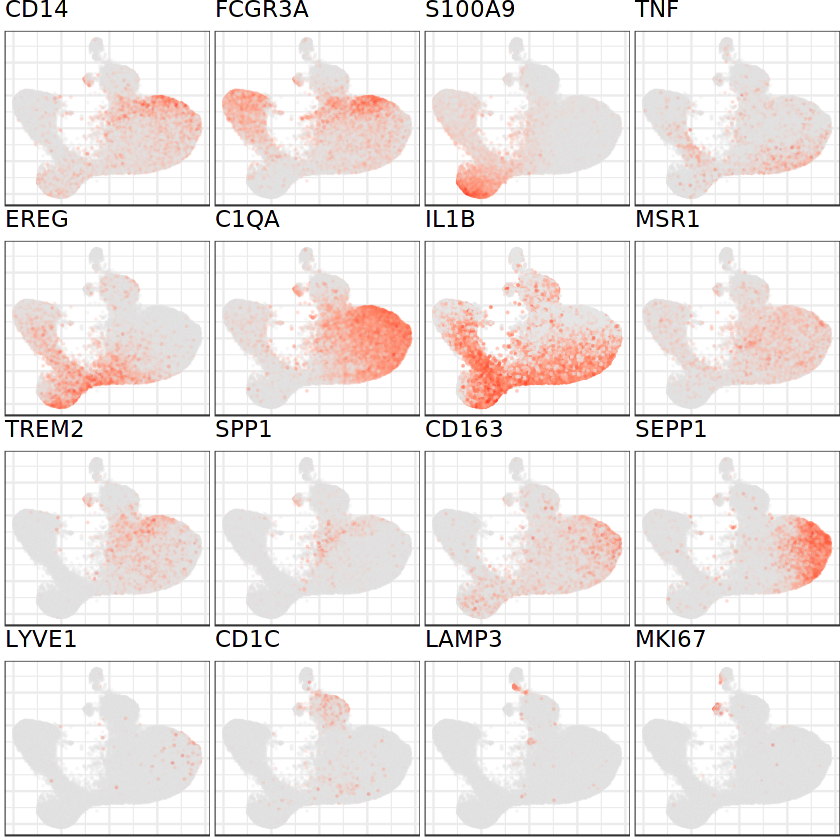

In [7]:
# marker gene expression
gs=c("CD14",'FCGR3A','S100A9','TNF','EREG','C1QA','IL1B','MSR1','TREM2','SPP1','CD163','SEPP1','LYVE1','CD1C','LAMP3','MKI67')#,'IL10','CD163','CCL20','CCL4'

cname=names(anoM)
exp=t(sp2$counts)
cname=intersect(cname,colnames(exp))

lcol=4
lrow=4
lis=list()
for (gene in gs){
  print(gene)
  alpha =0.2
  if (gene %in% c('IL10','IL1B')){
    alpha =0.5
  }
  # a=con$plotGraph(colors =exp[gene,cname],title=gene,alpha =alpha,plot.na=F,size=0.2)+ theme(plot.title = element_text(size=19,hjust = 0.5))
  a=conM$plotGraph(colors =exp[gene,cname],alpha =alpha,plot.na=F,size=0.1,title=gene)
  lis[[gene]]=a
}

b=  cowplot::plot_grid(plotlist=lis, ncol=lrow, nrow=lcol)
b

In [8]:
anoM2 = anoM[grepl('Macro-',anoM)] %>% Toch() %>%  as.factor()
stype= Toch(stype)
cname = intersect(names(stype),names(anoM2))
anoM2 = anoM2[cname]

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.02299 0.04031 0.04402 0.06037 0.30864 


Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font width unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font metrics unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font width unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font metrics unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font width unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font metrics unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font width unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font 

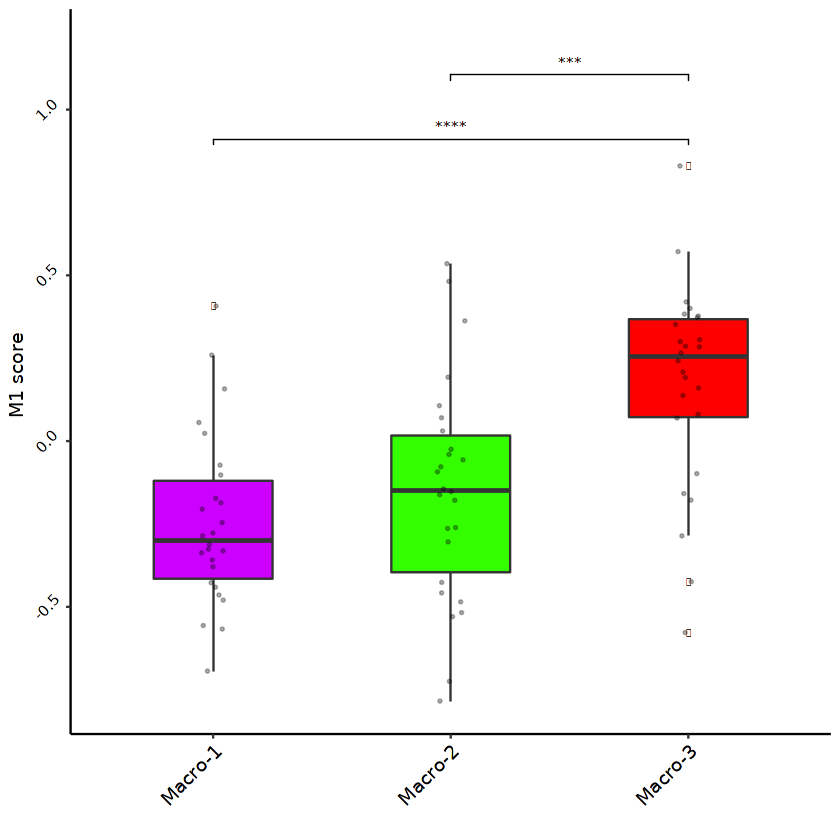

In [9]:
glist=scProcess:::getMarkers()
# M2 score 
ylab='M1 score '
cname=names(anoM2)
gs=glist$M1

df=Signature_score(anoM2[cname],gs,sp2$counts,stype[cname],ssamp,min.num.cell=5,magnitude.normal = TRUE)


p1=drawBoxplot(ylab,df,ylab,myeloid.col=anoM.pal,limHeight=1.45,height=2.7,width=2.4,sigl=c('Macro-1', 'Macro-2', 'Macro-3'))

p1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.04061 0.05565 0.05781 0.07271 0.19095 


Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font width unknown for character 0x1”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“font metrics unknown for character 0x1”
Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”


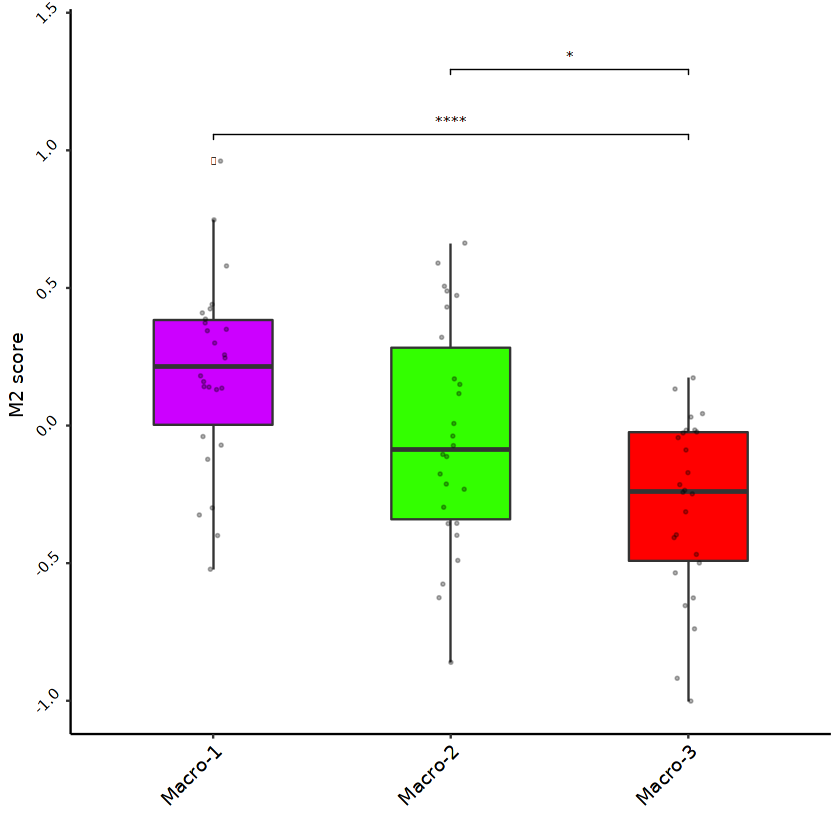

In [10]:
# M2 score 
ylab='M2 score '
cname=names(anoM2)
gs=c(glist$M2,'TREM2')
gs = setdiff(gs,c('CCL20','VEGFA'))
#cname = cname[grepl('Tumor',cname)]

df=Signature_score(anoM2[cname],gs,sp2$counts,stype[cname],ssamp,min.num.cell=5,magnitude.normal = TRUE)


p2 = drawBoxplot(ylab,df,ylab,myeloid.col=anoM.pal,limHeight=1.45,height=2.7,width=2.4,sigl=c('Macro-1', 'Macro-2', 'Macro-3'))
p2


Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend




[1] "blue"
[1] "white"
[1] "red"


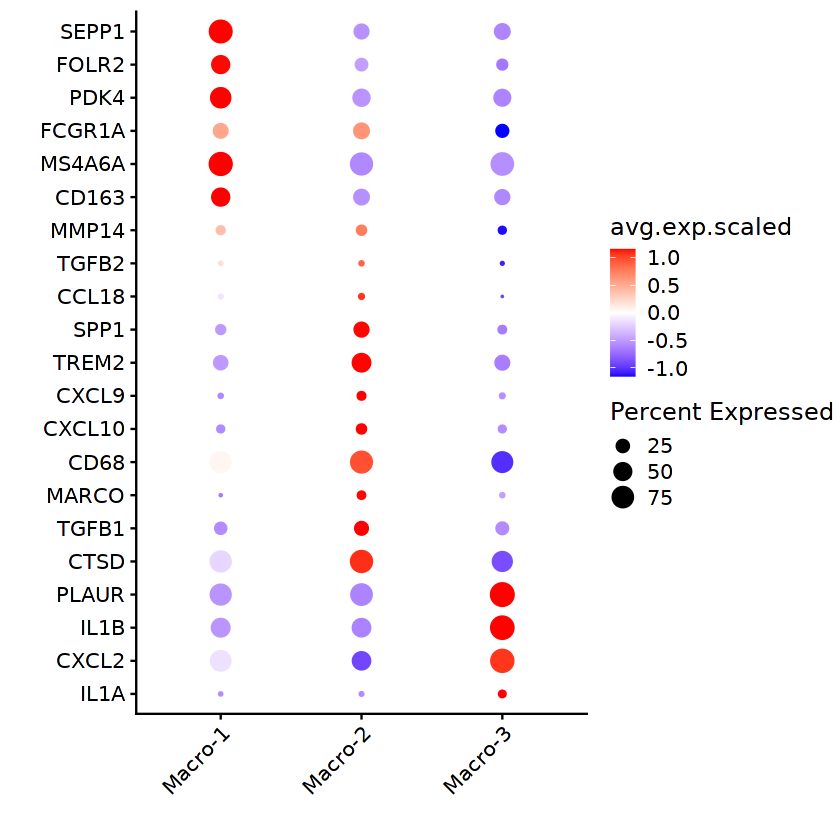

In [11]:
# more marker genes and M1/M2 signatures
gs =c('SEPP1','FOLR2','PDK4','FCGR1A','MS4A6A','CD163','MMP14','TGFB2','CCL18',
      'SPP1','TREM2','CXCL9','CXCL10','CD68','MARCO','TREM2','TGFB1','CTSD',
      'PLAUR','IL1B','CXCL2','IL1A'
     )


anoM2 = anoM[grepl('Macro',anoM)] %>% Toch() %>%  as.factor()
library(cowplot)
aexp=t(sp2$counts)


cname = names(anoM2)
cname = intersect(cname,colnames(aexp))

gs=intersect(gs,rownames(aexp))
#cname=intersect(cname,colnames(aexp))
p=Dotfig(gs,aexp[,cname],anoM2[cname],cols = c("blue","white", "red"))+xlab('')+ylab('')
p


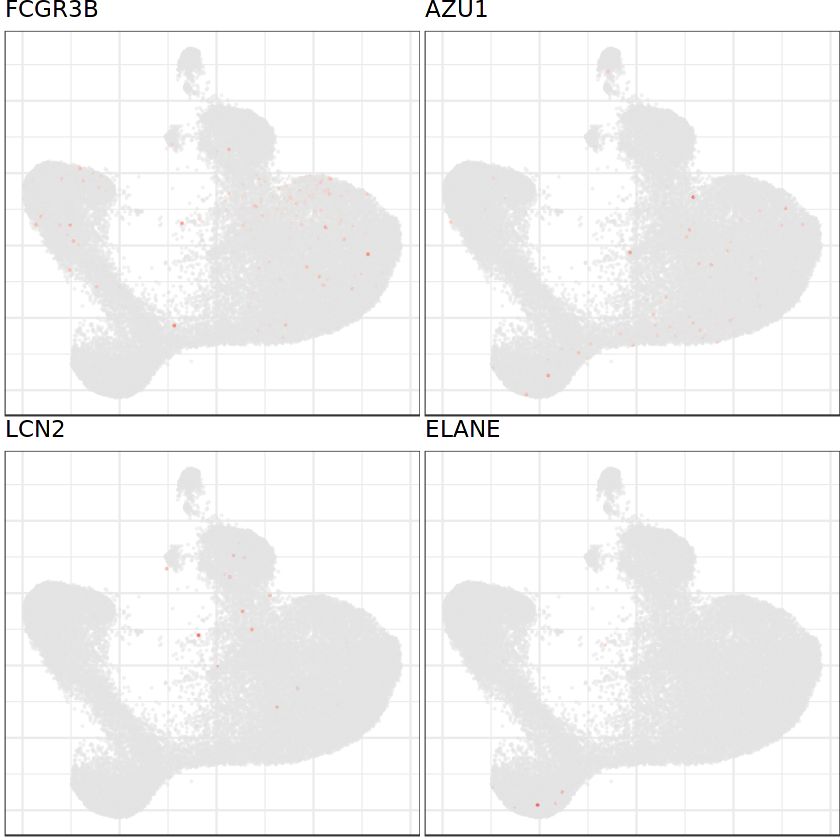

In [13]:
# neutrophil marker gene expression

gs = c('FCGR3B','AZU1','LCN2','ELANE')
b = lapply(sn(gs),function(x) scon$plotGraph(gene=x,title=x,size=0.1))

fig=cowplot::plot_grid(plotlist=b, ncol=2, nrow=2)
fig

In [14]:
table(t.ano2)

t.ano2
proliferating Macro   proliferating mDC 
                171                  63 

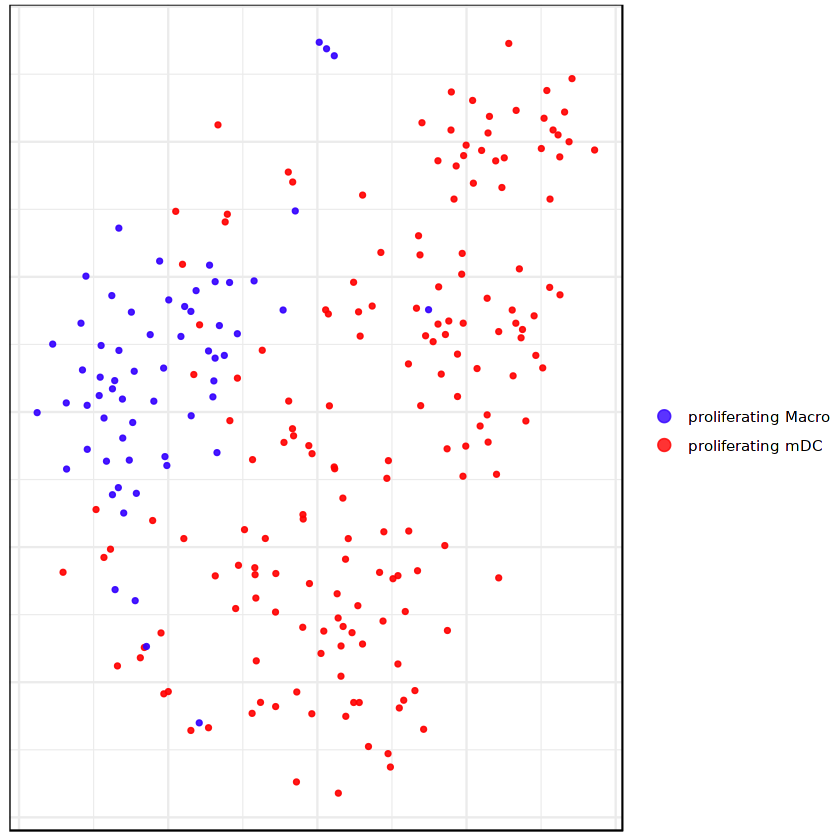

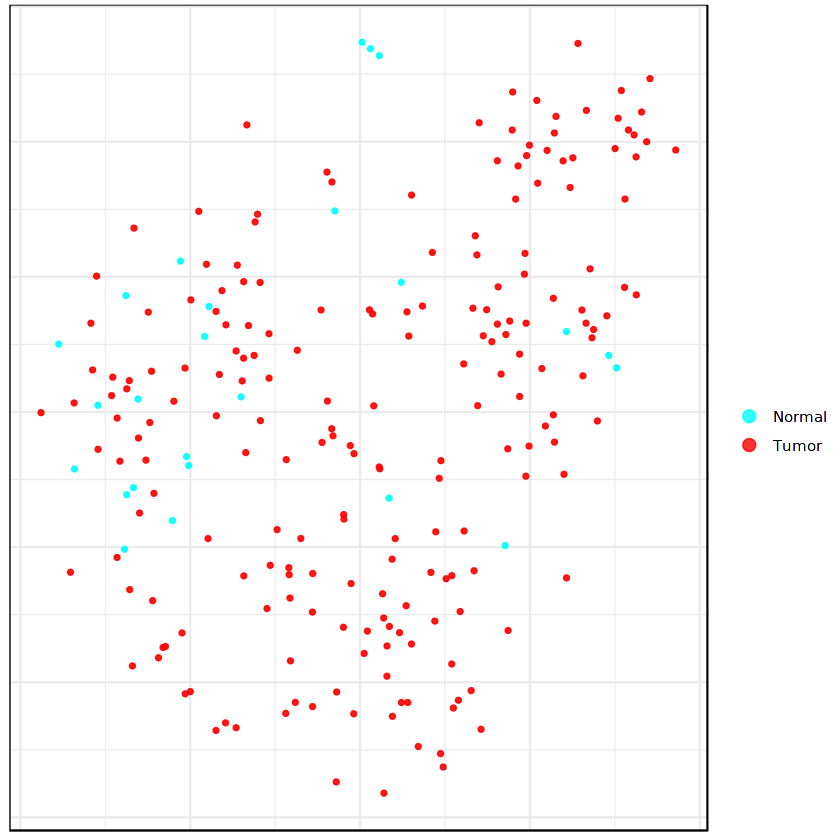

In [15]:
# proliferating myeloid cells

a2=conJ$plotGraph(groups=t.ano2,plot.na=F,palette=anoM.palf2,size=1,alpha=0.9,font.size = c(4, 4.5),show.legend = TRUE,mark.groups = F)
f1=embForMat(a2)

fraction.palette1=c("#00FFFFFF","#FF0000FF")
names(fraction.palette1)=levels(stype)


fraction.palette1f <- function(n) return(fraction.palette1[1:n])

a2=conJ$plotGraph(groups=stype[names(t.ano2)],plot.na=F,palette=fraction.palette1f,size=1,alpha=0.9,font.size = c(4, 4.5),show.legend = TRUE,mark.groups = F)
f2 = embForMat(a2)

f1
f2


In [ ]:
save.image(file='Myeloid.RData')
